In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.19.0'

## 실습. MNIST 데이터 이미지 분류

### DNN을 이용한 MNIST 데이터 이미지 분류

In [3]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical

#### 데이터 준비

In [4]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

In [7]:
train_X = train_input.reshape((60000, 28*28))
train_X = train_X.astype('float32') / 255 
test_X = test_input.reshape((10000, 28*28))
test_X = test_X.astype('float32') / 255

#### 모델 정의(bulid)

In [8]:
model = models.Sequential()
model.add(layers.Input(shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#### 모델 요약

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

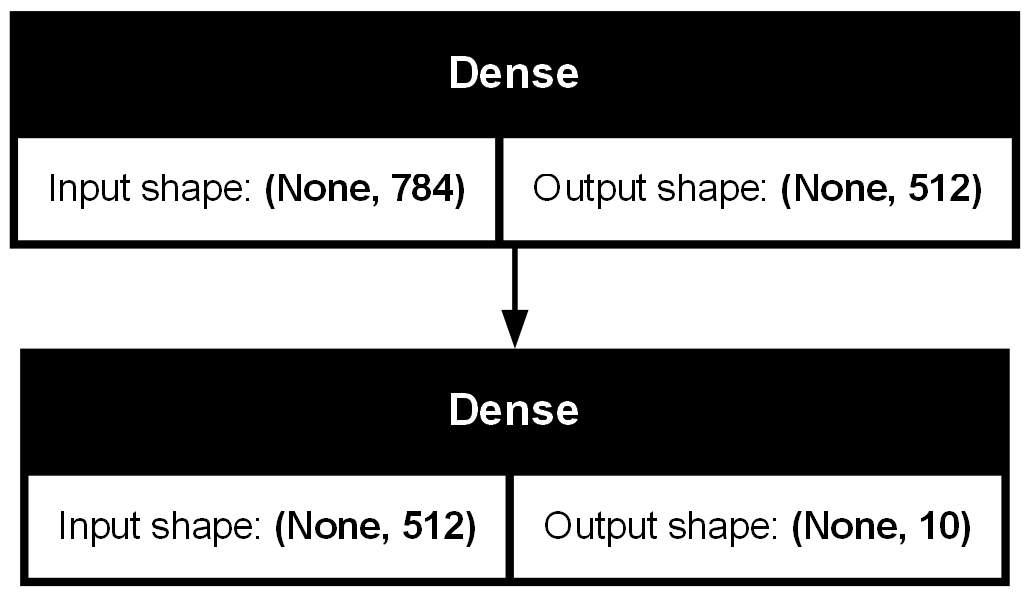

In [10]:
keras.utils.plot_model(model, show_shapes=True)

#### 모델 컴파일

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### 모델 훈련

In [12]:
history = model.fit(train_X, train_target, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9245 - loss: 0.2652
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9685 - loss: 0.1065
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9794 - loss: 0.0696
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0366


#### 훈련데이터에 대한 손실과 정확도 확인 및 시각화

In [16]:
def draw_loss_metric_plot(history):
    plt.figure(figsize=(10,5))
    for i, item in enumerate(history.history.keys()):
        plt.subplot(1,2,i+1)
        n = len(history.history[item])
        plt.plot(range(1, n+1), history.history[item], label=item)
        plt.xlabel('epoch')
        plt.ylabel(item)
        plt.title(f'{item} plot')
        plt.legend()
    plt.show()

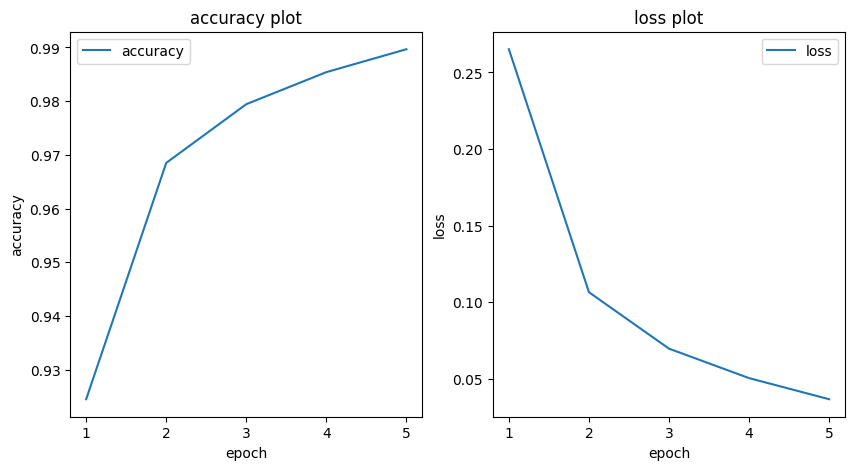

In [18]:
draw_loss_metric_plot(history)

In [19]:
history.history.items()

dict_items([('accuracy', [0.9244999885559082, 0.968500018119812, 0.9794333577156067, 0.9854000210762024, 0.9896666407585144]), ('loss', [0.26519230008125305, 0.10646627843379974, 0.06959482282400131, 0.05035318061709404, 0.03656492754817009])])

In [20]:
print(f' train data loss:{history.history['loss'][-1]},accuracy:{history.history['accuracy'][-1]}')

 train data loss:0.03656492754817009,accuracy:0.9896666407585144


#### 모델 평가(test)

In [21]:
loss, acc = model.evaluate(test_X, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0652


#### 테스트 데이터에 대한 손실과 정확도 확인

In [22]:
print(f' test data loss:{loss},accuracy:{acc}')

 test data loss:0.06516484916210175,accuracy:0.9800000190734863


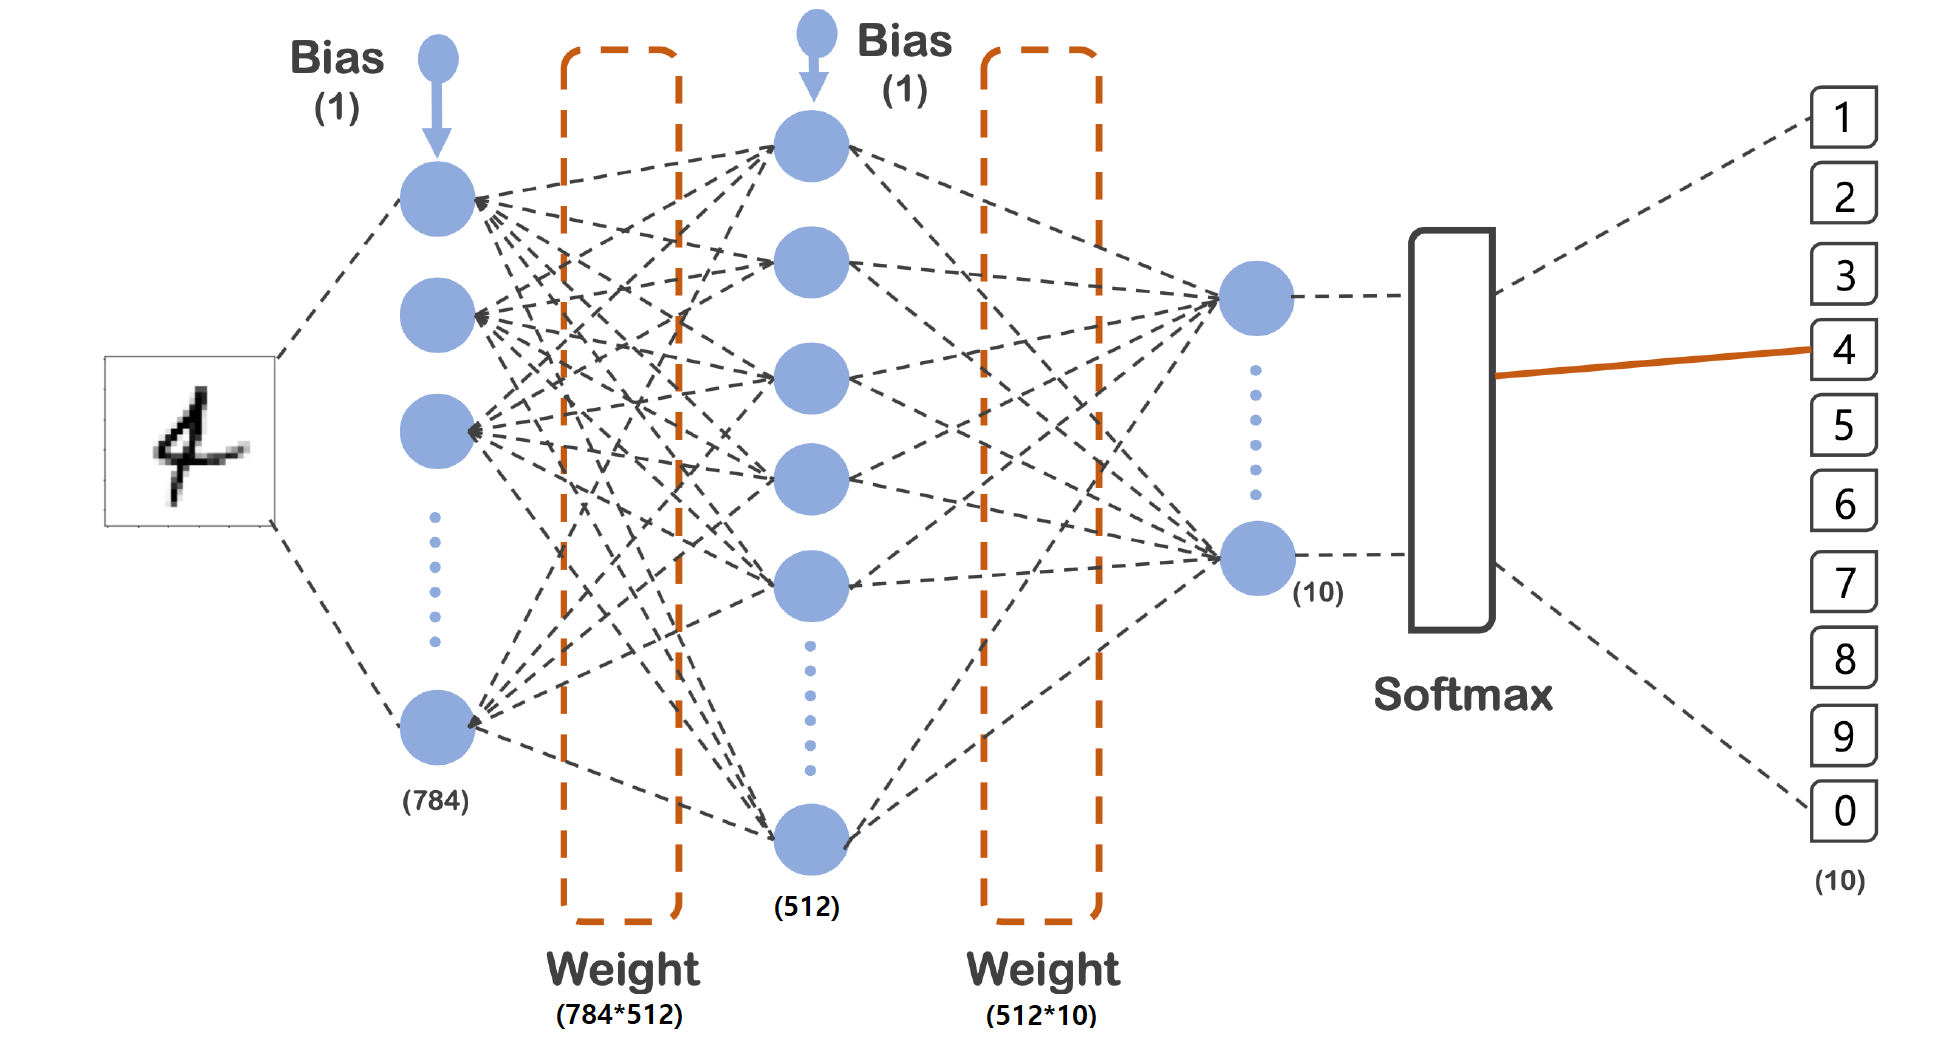

----

### 합성곱 신경망을 이용한 MNIST 숫자 이미지 분류

#### 데이터 준비

In [23]:
train_y = to_categorical(train_target)
test_y = to_categorical(test_target)

#### 모델 정의

In [31]:
cnn_model = models.Sequential()
cnn_model.add(layers.Input(shape=(28,28,1)))
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

#### 모델 훈련 및 평가

In [32]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(train_input, train_y, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9341 - loss: 0.3019
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9807 - loss: 0.0647
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9859 - loss: 0.0458
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9881 - loss: 0.0381
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9904 - loss: 0.0309


In [33]:
cnn_model.evaluate(test_input, test_y)
print(f'test data loss:{loss:.4f}, accuracy:{acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0669
test data loss:0.0652, accuracy:0.9800


#### 모델 요약

In [34]:
cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)